kütüphane import

In [ ]:
from google.colab import drive 
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [ ]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D,UpSampling2D

In [ ]:
from keras.models import Model
from keras.callbacks import TensorBoard
from keras.datasets import mnist
import numpy as np
from keras import backend as K
import matplotlib.pyplot as plt
    

In [ ]:
(x_train, _) , (x_test, _) = mnist.load_data(0)

11501568/11490434 [==============================] - 0s 0us/step


Veri kümesi oluşturma 

In [ ]:
x_train = x_train.astype('float32') / 255

In [ ]:
x_test = x_test.astype('float32') / 255

In [ ]:
x_train = np.reshape(x_train,(len(x_train), 28,28,1))
x_test = np.reshape(x_test,(len(x_test), 28,28,1))


In [ ]:
print(x_train.shape)
x_test.shape

(60000, 28, 28, 1)


(10000, 28, 28, 1)

gürültü ekleme mnist datasına


In [ ]:
noise_factor = 0.5

x_train_noisy = x_train + noise_factor * np.random.normal(loc = 0.0, scale = 1.0, size = x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc = 0.0, scale = 1.0, size = x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0, 1)
x_test_noisy = np.clip(x_test_noisy, 0, 1)

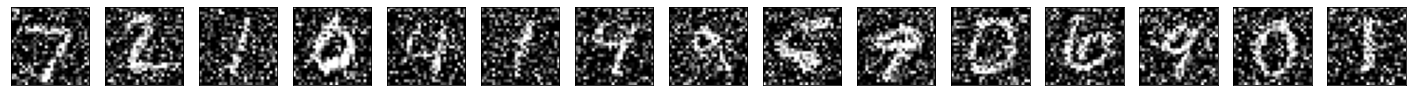

Noisy Pict


In [ ]:
%matplotlib inline

n = 15
plt.figure(figsize = (25,4))

for i in range(n):
  ax = plt.subplot(2, n, i+1)
  plt.imshow(x_test_noisy[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False) # görüntüyü direkt görmek için
  ax.get_yaxis().set_visible(False)
plt.show()
print("Noisy Pict")

In [ ]:
input_img = Input(shape = (28,28,1))

x = Conv2D(32, (3,3),activation = 'relu',padding = 'same',input_shape=(28,28,1))(input_img) #32 KANAL 3 3 Filre aktivasyon relu
#padding same aynı boyutta kalması için uygulanıyor
x = MaxPooling2D((2,2),padding = 'same')(x)

x = Conv2D(32, (3,3), activation='relu',padding = 'same')(x)

encoded = MaxPooling2D((2,2),padding='same')(x)


# 7,7,32

ENCODE ^


DECODE


In [ ]:
x = Conv2D(32,(3,3), activation = 'relu',padding='same')(encoded)

x = UpSampling2D((2,2))(x) #büyütme işlemi yumuşatma yapıyor

x = Conv2D(32,(3,3),activation='relu',padding='same')(x)

x = UpSampling2D((2,2))(x) #büyütme işlemi yumuşatma yapıyor

decoded = Conv2D(1,(3,3),activation='sigmoid',padding='same')(x)


In [ ]:
autoencoder = Model(input_img, decoded) 
autoencoder.compile(optimizer='adadelta',loss='binary_crossentropy')

In [ ]:
autoencoder.fit(x_train_noisy, x_train,
                epochs = 100,
                batch_size=128,
                shuffle=True,
                validation_data = (x_test_noisy, x_test),
                callbacks = [TensorBoard(log_dir='/tmp/tb', histogram_freq=0,write_graph=False)])
decoded_imgs = autoencoder.predict(x_test)

Epoch 1/100
469/469 [==============================] - 146s 312ms/step - loss: 0.4771 - val_loss: 0.4778
Epoch 2/100
469/469 [==============================] - 146s 311ms/step - loss: 0.4711 - val_loss: 0.4714
Epoch 3/100
469/469 [==============================] - 147s 314ms/step - loss: 0.4644 - val_loss: 0.4641
Epoch 4/100
469/469 [==============================] - 148s 316ms/step - loss: 0.4567 - val_loss: 0.4559
Epoch 5/100
469/469 [==============================] - 148s 315ms/step - loss: 0.4482 - val_loss: 0.4468
Epoch 6/100
469/469 [==============================] - 149s 319ms/step - loss: 0.4386 - val_loss: 0.4366
Epoch 7/100
469/469 [==============================] - 144s 308ms/step - loss: 0.4277 - val_loss: 0.4246
Epoch 8/100
469/469 [==============================] - 145s 308ms/step - loss: 0.4147 - val_loss: 0.4103
Epoch 9/100
469/469 [==============================] - 144s 306ms/step - loss: 0.3993 - val_loss: 0.3932
Epoch 10/100
469/469 [==============================] -

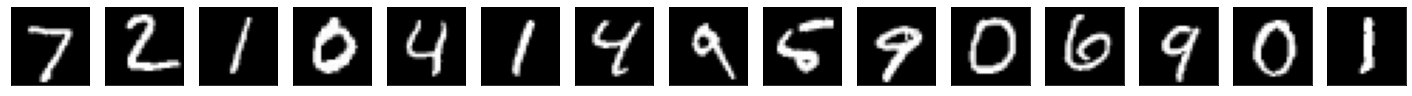

Clean Pict


In [ ]:
%matplotlib inline

n = 15
plt.figure(figsize = (25,4))

for i in range(n):
  ax = plt.subplot(2, n, i+1)
  plt.imshow(x_test[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False) # görüntüyü direkt görmek için
  ax.get_yaxis().set_visible(False)
plt.show()
print("Clean Pict")

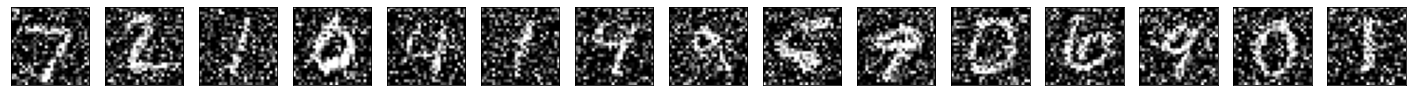

Noisy Pict


In [ ]:
%matplotlib inline

n = 15
plt.figure(figsize = (25,4))

for i in range(n):
  ax = plt.subplot(2, n, i+1)
  plt.imshow(x_test_noisy[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False) # görüntüyü direkt görmek için
  ax.get_yaxis().set_visible(False)
plt.show()
print("Noisy Pict")

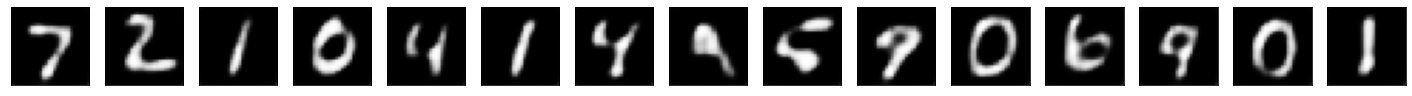

Denoised


In [ ]:
%matplotlib inline
n = 15
plt.figure(figsize=(25,4))
for i in range(n):
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(decoded_imgs[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()
print("Denoised")